In [1]:
import numpy as np
import pandas as pd

In [75]:
account_info = pd.read_csv('Datasets/account_info.csv')
customer_support = pd.read_csv('Datasets/customer_support.csv')
in_app_purchase_data = pd.read_csv('Datasets/in_app_purchase_data.csv')
subscription_data = pd.read_csv('Datasets/subscription_data.csv')
usage_data = pd.read_csv('Datasets/usage_data.csv')
user_demographics = pd.read_csv('Datasets/user_demographics.csv')

In [3]:
core_customer_data_df = pd.merge(user_demographics, account_info, on='user_id', how='outer')
core_customer_data_df = pd.merge(core_customer_data_df, customer_support, on='user_id', how='outer')

In [4]:
subscription_data_df = pd.DataFrame(subscription_data)

subscription_data_df.fillna({'cancellation_date': 'Active Subscription'}, inplace=True)
subscription_data_df.fillna({'upgrade_date': 'No Upgrade'}, inplace=True)
subscription_data_df.fillna({'downgrade_date': 'No Downgrade'}, inplace=True)

In [5]:
in_app_purchase_data.isnull().sum()

user_id            0
purchase_date      0
product_type       0
purchase_amount    0
dtype: int64

In [6]:
usage_data.isnull().sum()

user_id               0
date                  0
file_count            0
file_size_total       0
storage_used          0
share_count           0
device_type           0
feature_used          0
session_id            0
session_start_time    0
session_end_time      0
session_duration      0
dtype: int64

## Descriptive Statistics

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
core_customer_data_df.describe()

,user_id,age,resolution_time
count,10382.000000,10382.000000,2547.000000
mean,5016.576479,44.540358,63.737731
std,2886.392238,19.315805,31.836871
min,1.000000,16.000000,10.000000
25%,2517.250000,25.000000,36.000000
50%,5025.500000,40.000000,64.000000
75%,7517.750000,55.000000,91.000000
max,10000.000000,80.000000,119.000000


In [9]:
core_customer_data_df.isnull().sum()

user_id                     0
age                         0
gender                      0
location                    0
occupation                  0
education_level             0
account_creation_date       0
subscription_type_x         0
plan_level_x                0
payment_method              0
interaction_id           7835
interaction_date         7835
issue_type               7835
resolution_time          7835
subscription_type_y      7835
plan_level_y             7835
dtype: int64

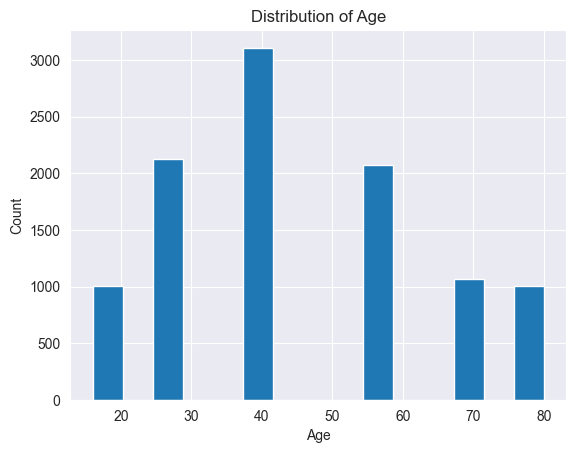

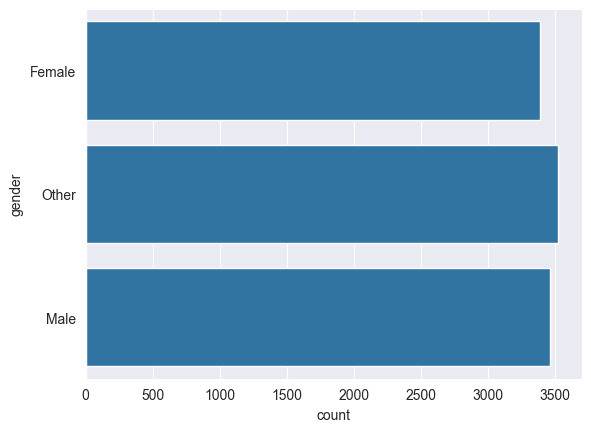

In [10]:
plt.hist(core_customer_data_df['age'], bins=15)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

sns.countplot(core_customer_data_df['gender'])
plt.show()

### The gender distribution looks good, almost equally distributed.
### The age distribution looks right skewed, which means theres a longer tail towards the older age groups
### The highest frequency of individuals falls within the age range of 30-40 years.


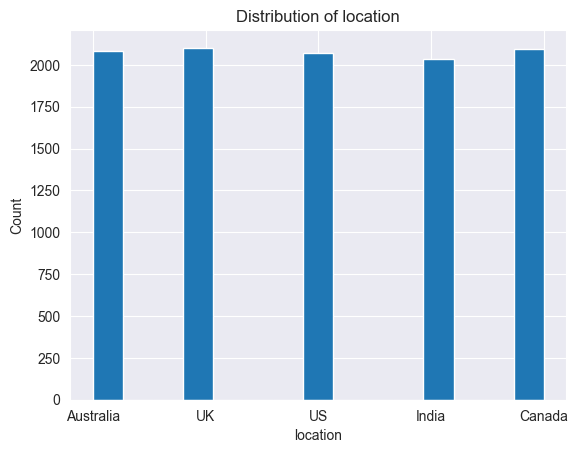

In [11]:
plt.hist(core_customer_data_df['location'], bins=15)
plt.xlabel('location')
plt.ylabel('Count')
plt.title('Distribution of location')
plt.show()

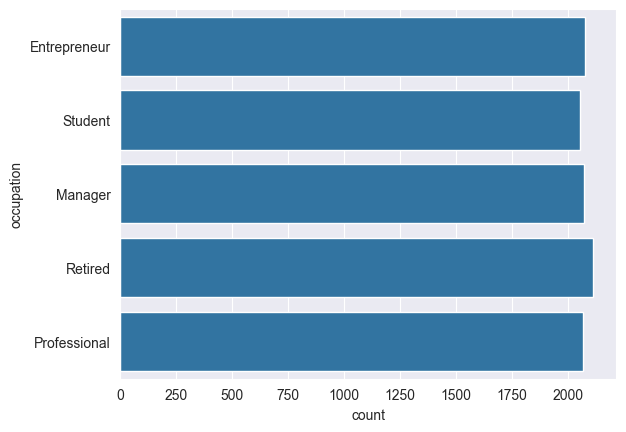

In [12]:
sns.countplot(core_customer_data_df['occupation'])
plt.show()

In [13]:
def create_age_groups(core_customer_data_df):
    bins = [16, 25, 40, 56, 75, np.inf]
    labels = ['Gen Z', 'Millennials', 'Gen X', 'Baby Boomers', 'Older']
    core_customer_data_df['age_group'] = pd.cut(core_customer_data_df['age'], bins=bins, labels=labels)
    return core_customer_data_df

core_customer_data_df = create_age_groups(core_customer_data_df)

In [14]:
core_customer_data_df.head()

,user_id,age,gender,location,occupation,education_level,account_creation_date,subscription_type_x,plan_level_x,payment_method,interaction_id,interaction_date,issue_type,resolution_time,subscription_type_y,plan_level_y,age_group
0,1,55,Female,Australia,Entrepreneur,College,2022-12-31,Paid,Basic,PayPal,1_2,"DatetimeIndex(['2023-05-19'], dtype='datetime6...",Other,18.0,Paid,Business Plus,Gen X
1,2,16,Other,UK,Entrepreneur,College,2022-12-01,Paid,Business,PayPal,2_1,"DatetimeIndex(['2023-10-03'], dtype='datetime6...",Billing,64.0,Free,Essentials,NaN
2,3,25,Other,US,Student,High School,2022-12-28,Paid,Basic,Credit Card,NaN,NaN,NaN,NaN,NaN,NaN,Gen Z
3,4,40,Other,India,Manager,High School,2022-12-31,Paid,Essentials,Credit Card,NaN,NaN,NaN,NaN,NaN,NaN,Millennials
4,5,80,Other,Australia,Student,High School,2022-12-30,Free,Plus,PayPal,NaN,NaN,NaN,NaN,NaN,NaN,Older


In [15]:
numerical_cols = ['age', 'resolution_time']
grouped_data = core_customer_data_df.groupby('age_group')[numerical_cols].describe()
print(grouped_data)

                 age                                          resolution_time  \
               count  mean  std   min   25%   50%   75%   max           count   
age_group                                                                       
Gen Z         2130.0  25.0  0.0  25.0  25.0  25.0  25.0  25.0           505.0   
Millennials   3109.0  40.0  0.0  40.0  40.0  40.0  40.0  40.0           770.0   
Gen X         2072.0  55.0  0.0  55.0  55.0  55.0  55.0  55.0           527.0   
Baby Boomers  1064.0  70.0  0.0  70.0  70.0  70.0  70.0  70.0           252.0   
Older         1004.0  80.0  0.0  80.0  80.0  80.0  80.0  80.0           254.0   

                                                                    
                   mean        std   min   25%   50%    75%    max  
age_group                                                           
Gen Z         63.788119  32.499277  10.0  36.0  64.0  92.00  119.0  
Millennials   64.951948  31.218581  10.0  37.0  67.0  92.00  119.0  
Gen X 

/var/folders/xb/90j9vtdn3s97z_j9gkzhg4940000gn/T/ipykernel_96235/1504112929.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = core_customer_data_df.groupby('age_group')[numerical_cols].describe()


/var/folders/xb/90j9vtdn3s97z_j9gkzhg4940000gn/T/ipykernel_96235/3225029213.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_resolution_time = core_customer_data_df.groupby('age_group')['resolution_time'].mean()


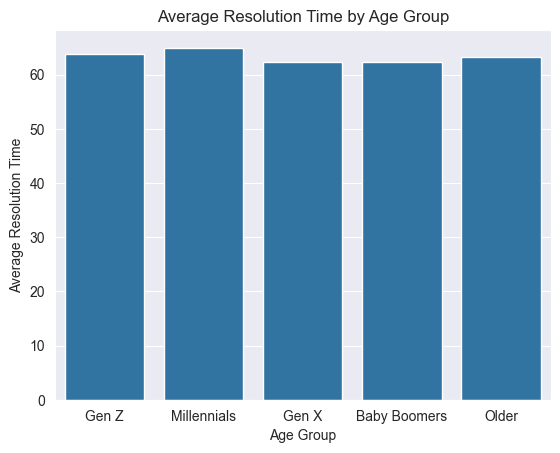

In [16]:
# average resolution time by age group
avg_resolution_time = core_customer_data_df.groupby('age_group')['resolution_time'].mean()

# Visualize average resolution time by age group
sns.barplot(x=avg_resolution_time.index, y=avg_resolution_time)
plt.xlabel('Age Group')
plt.ylabel('Average Resolution Time')
plt.title('Average Resolution Time by Age Group')
plt.show()


No significant differences in age distribution: The age groups are well-defined with minimal overlap.
Slight variations in resolution time: While there are minor differences in average resolution time, further analysis is needed to determine if these differences are statistically significant.

In [17]:
usage_data.describe()

,user_id,file_count,file_size_total,storage_used,share_count,session_duration
count,195608.000000,195608.000000,195608.000000,195608.000000,195608.000000,195608.000000
mean,4999.448714,58.331580,5345.197430,25.943196,4.664517,2067.837205
std,2884.968256,29.339828,3097.827775,14.803829,3.002649,864.804942
min,1.000000,8.000000,85.511113,0.900000,0.000000,600.000000
25%,2495.000000,33.656442,2688.176178,13.280089,2.051764,1320.000000
50%,5005.000000,57.048849,5294.750118,25.852224,4.605689,2040.000000
75%,7501.000000,80.315605,7858.573643,38.362693,7.200000,2820.000000
max,10000.000000,130.680000,12418.758000,56.595000,10.395000,3540.000000


In [18]:
usage_data.head()

,user_id,date,file_count,file_size_total,storage_used,share_count,device_type,feature_used,session_id,session_start_time,session_end_time,session_duration
0,1,2023-11-22,10.004219,1584.340749,21.099481,4.795337,mobile,file_editing,1_2023-11-22 00:00:00_6,2023-11-22 20:00:00,2023-11-22 20:55:00,3300.0
1,1,2023-01-06,70.400000,100.980000,31.185000,1.890000,tablet,file_editing,1_2023-01-06 00:00:00_1,2023-01-06 18:00:00,2023-01-06 18:29:00,1740.0
2,1,2023-10-31,28.399882,6858.059640,20.868711,0.948578,mobile,commenting,1_2023-10-31 00:00:00_4,2023-10-31 17:00:00,2023-10-31 17:43:00,2580.0
3,1,2023-08-16,21.120000,10749.510000,18.480000,10.395000,desktop,file_sharing,1_2023-08-16 00:00:00_7,2023-08-16 06:00:00,2023-08-16 06:31:00,1860.0
4,1,2023-03-06,77.000000,7105.320000,15.750000,5.250000,tablet,file_sharing,1_2023-03-06 00:00:00_9,2023-03-06 00:00:00,2023-03-06 00:31:00,1860.0


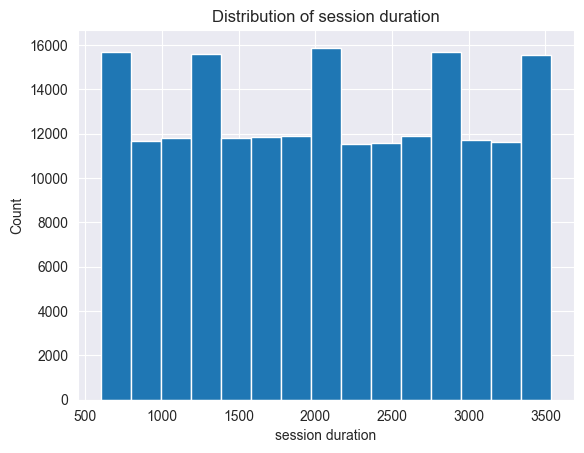

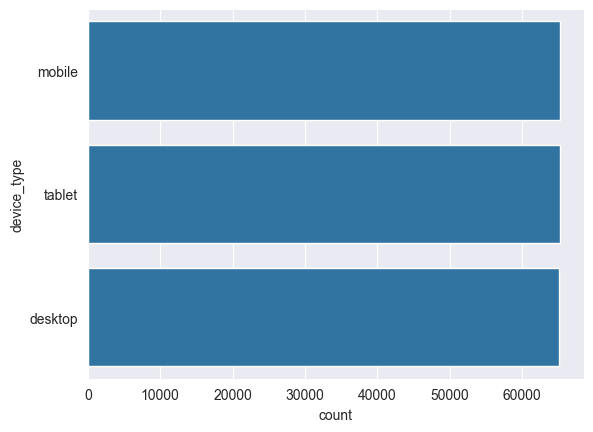

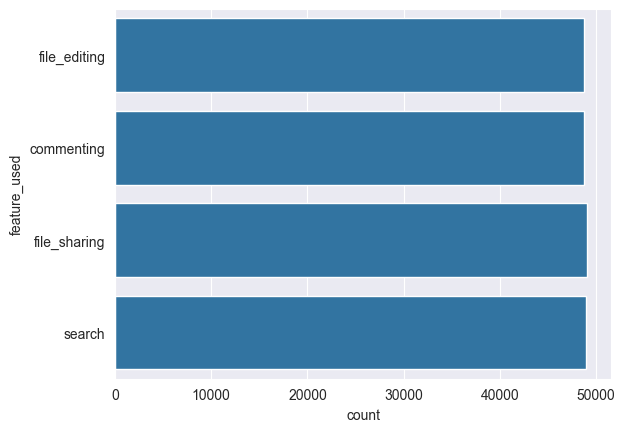

In [19]:
usage_data.isnull().sum()
plt.hist(usage_data['session_duration'], bins=15)
plt.xlabel('session duration')
plt.ylabel('Count')
plt.title('Distribution of session duration')
plt.show()

sns.countplot(usage_data['device_type'])
plt.show()

sns.countplot(usage_data['feature_used'])
plt.show()

In [20]:
subscription_data.describe()

,user_id,revenue_generated
count,6972.000000,6972.000000
mean,4986.049771,513.375932
std,2883.564543,528.937185
min,1.000000,9.333333
25%,2490.500000,152.666667
50%,4985.500000,325.333333
75%,7498.250000,661.666667
max,10000.000000,2343.333333


In [21]:
subscription_data.head()

,user_id,subscription_start_date,subscription_end_date,plan_level,payment_method,revenue_generated,upgrade_date,downgrade_date,cancellation_date
0,1,2023-05-28,2024-10-28,Basic,PayPal,173.000000,No Upgrade,No Downgrade,Active Subscription
1,2,2023-11-10,2024-02-10,Business Plus,Credit Card,306.666667,No Upgrade,No Downgrade,Active Subscription
2,3,2023-08-19,2023-10-19,Plus,Credit Card,40.666667,No Upgrade,No Downgrade,Active Subscription
3,4,2023-07-21,2024-02-21,Essentials,PayPal,215.000000,No Upgrade,No Downgrade,Active Subscription
4,6,2023-06-05,2024-02-05,Business,Credit Card,408.333333,No Upgrade,No Downgrade,Active Subscription


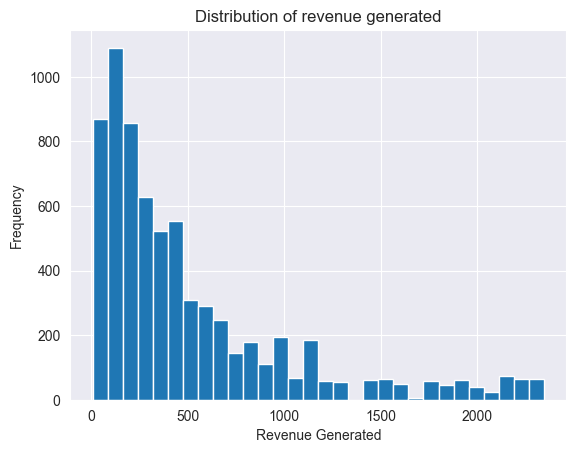

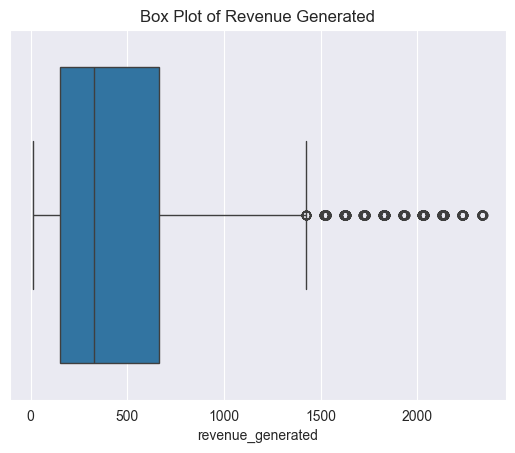

In [22]:
usage_data.isnull().sum()
plt.hist(subscription_data['revenue_generated'], bins=30)
plt.xlabel('Revenue Generated')
plt.ylabel('Frequency')
plt.title('Distribution of revenue generated')
plt.show()

sns.boxplot(x=subscription_data['revenue_generated'])
plt.title('Box Plot of Revenue Generated')
plt.show()

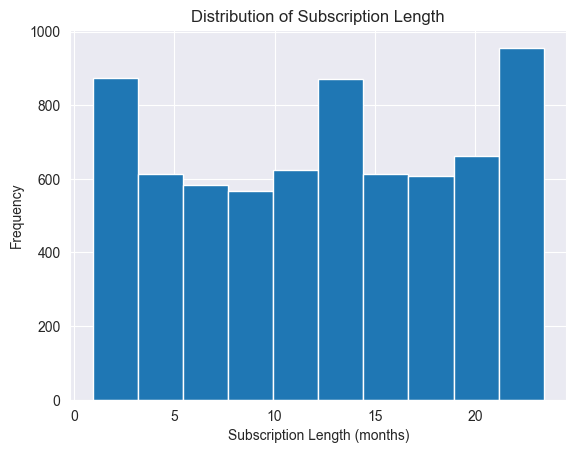

In [23]:
# Convert dates to datetime format
if not pd.api.types.is_datetime64_dtype(subscription_data['subscription_end_date']):
    subscription_data['subscription_end_date'] = pd.to_datetime(subscription_data['subscription_end_date'])
if not pd.api.types.is_datetime64_dtype(subscription_data['subscription_start_date']):
    subscription_data['subscription_start_date'] = pd.to_datetime(subscription_data['subscription_start_date'])

#subscription length
subscription_data['subscription_length'] = (subscription_data['subscription_end_date'] - subscription_data['subscription_start_date']).dt.days / 30

# Histogram
plt.hist(subscription_data['subscription_length'], bins=10)
plt.xlabel('Subscription Length (months)')
plt.ylabel('Frequency')
plt.title('Distribution of Subscription Length')
plt.show()

In [24]:

churned_customers = subscription_data[subscription_data['cancellation_date'] != 'Active Subscription']

# churn rate
churn_rate = len(churned_customers) / len(subscription_data) * 100
print('Churn Rate:', churn_rate, '%')


Churn Rate: 9.38037865748709 %


The churn rate is 9.38%

In [25]:
revenue_segments = pd.qcut(subscription_data['revenue_generated'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
subscription_data['revenue_segment'] = revenue_segments

# Analyze other metrics by revenue segment
print(subscription_data.groupby('revenue_segment')['subscription_length'].mean())


revenue_segment
Low           5.830742
Medium       11.961234
High         14.694610
Very High    17.270989
Name: subscription_length, dtype: float64


/var/folders/xb/90j9vtdn3s97z_j9gkzhg4940000gn/T/ipykernel_96235/360762057.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(subscription_data.groupby('revenue_segment')['subscription_length'].mean())


In [26]:
in_app_purchase_data.describe()

,user_id,purchase_amount
count,19726.000000,19726.000000
mean,4993.629220,50.649243
std,2901.848924,28.574340
min,1.000000,0.991512
25%,2484.500000,25.840110
50%,5003.000000,50.792669
75%,7518.000000,75.485462
max,10000.000000,99.981490


In [27]:
in_app_purchase_data.head()

,user_id,purchase_date,product_type,purchase_amount
0,1,2023-09-04,non_consumable,63.628653
1,1,2023-06-15,in_app_currency,46.478209
2,2,2023-02-17,in_app_currency,43.398328
3,5,2023-03-12,in_app_currency,41.759746
4,5,2023-06-04,non_consumable,86.013651


In [28]:
in_app_purchase_data.isnull().sum()

user_id            0
purchase_date      0
product_type       0
purchase_amount    0
dtype: int64

In [29]:
combined_df = pd.merge(core_customer_data_df, usage_data, on='user_id', how='outer')
combined_df = pd.merge(combined_df, subscription_data, on='user_id', how='outer')
combined_df = pd.merge(combined_df, in_app_purchase_data, on='user_id', how='outer')

In [30]:
combined_df

,user_id,age,gender,location,occupation,education_level,account_creation_date,subscription_type_x,plan_level_x,payment_method_x,...,payment_method_y,revenue_generated,upgrade_date,downgrade_date,cancellation_date,subscription_length,revenue_segment,purchase_date,product_type,purchase_amount
0,1,55,Female,Australia,Entrepreneur,College,2022-12-31,Paid,Basic,PayPal,...,PayPal,173.000000,No Upgrade,No Downgrade,Active Subscription,17.300000,Medium,2023-09-04,non_consumable,63.628653
1,1,55,Female,Australia,Entrepreneur,College,2022-12-31,Paid,Basic,PayPal,...,PayPal,173.000000,No Upgrade,No Downgrade,Active Subscription,17.300000,Medium,2023-06-15,in_app_currency,46.478209
2,1,55,Female,Australia,Entrepreneur,College,2022-12-31,Paid,Basic,PayPal,...,PayPal,173.000000,No Upgrade,No Downgrade,Active Subscription,17.300000,Medium,2023-09-04,non_consumable,63.628653
3,1,55,Female,Australia,Entrepreneur,College,2022-12-31,Paid,Basic,PayPal,...,PayPal,173.000000,No Upgrade,No Downgrade,Active Subscription,17.300000,Medium,2023-06-15,in_app_currency,46.478209
4,1,55,Female,Australia,Entrepreneur,College,2022-12-31,Paid,Basic,PayPal,...,PayPal,173.000000,No Upgrade,No Downgrade,Active Subscription,17.300000,Medium,2023-09-04,non_consumable,63.628653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443081,10000,40,Other,US,Student,High School,2022-12-29,Paid,Essentials,Credit Card,...,Credit Card,243.333333,No Upgrade,No Downgrade,Active Subscription,12.166667,Medium,2023-06-08,in_app_currency,37.115181
443082,10000,40,Other,US,Student,High School,2022-12-29,Paid,Essentials,Credit Card,...,Credit Card,243.333333,No Upgrade,No Downgrade,Active Subscription,12.166667,Medium,2023-06-04,non_consumable,8.239666
443083,10000,40,Other,US,Student,High School,2022-12-29,Paid,Essentials,Credit Card,...,Credit Card,243.333333,No Upgrade,No Downgrade,Active Subscription,12.166667,Medium,2023-06-08,in_app_currency,37.115181
443084,10000,40,Other,US,Student,High School,2022-12-29,Paid,Essentials,Credit Card,...,Credit Card,243.333333,No Upgrade,No Downgrade,Active Subscription,12.166667,Medium,2023-06-04,non_consumable,8.239666


In [31]:
for col in combined_df.columns:
  if combined_df[col].dtype == object:
    print(col)


gender
location
occupation
education_level
account_creation_date
subscription_type_x
plan_level_x
payment_method_x
interaction_id
interaction_date
issue_type
subscription_type_y
plan_level_y
date
device_type
feature_used
session_id
session_start_time
session_end_time
plan_level
payment_method_y
upgrade_date
downgrade_date
cancellation_date
purchase_date
product_type


In [32]:
import pandas as pd

categorical_cols = ['gender', 'location', 'occupation', 'education_level', 'subscription_type_x', 'plan_level_x', 'payment_method_x', 'issue_type', 'device_type', 'feature_used', 'subscription_type_y', 'plan_level_y', 'payment_method_y', 'product_type']

# Perform one-hot encoding
combined_df = pd.get_dummies(combined_df, columns=categorical_cols)

In [33]:
combined_df.head()

,user_id,age,account_creation_date,interaction_id,interaction_date,resolution_time,age_group,date,file_count,file_size_total,...,plan_level_y_Basic,plan_level_y_Business,plan_level_y_Business Plus,plan_level_y_Essentials,plan_level_y_Plus,payment_method_y_Credit Card,payment_method_y_PayPal,product_type_consumable,product_type_in_app_currency,product_type_non_consumable
0,1,55,2022-12-31,1_2,"DatetimeIndex(['2023-05-19'], dtype='datetime6...",18.0,Gen X,2023-11-22,10.004219,1584.340749,...,False,False,True,False,False,False,True,False,False,True
1,1,55,2022-12-31,1_2,"DatetimeIndex(['2023-05-19'], dtype='datetime6...",18.0,Gen X,2023-11-22,10.004219,1584.340749,...,False,False,True,False,False,False,True,False,True,False
2,1,55,2022-12-31,1_2,"DatetimeIndex(['2023-05-19'], dtype='datetime6...",18.0,Gen X,2023-01-06,70.400000,100.980000,...,False,False,True,False,False,False,True,False,False,True
3,1,55,2022-12-31,1_2,"DatetimeIndex(['2023-05-19'], dtype='datetime6...",18.0,Gen X,2023-01-06,70.400000,100.980000,...,False,False,True,False,False,False,True,False,True,False
4,1,55,2022-12-31,1_2,"DatetimeIndex(['2023-05-19'], dtype='datetime6...",18.0,Gen X,2023-10-31,28.399882,6858.059640,...,False,False,True,False,False,False,True,False,False,True


In [34]:
combined_df_reduced = combined_df.drop(['account_creation_date','age_group','date','session_start_time', 'plan_level','upgrade_date','downgrade_date', 'session_end_time', 'user_id', 'subscription_start_date', 'subscription_end_date', 'gender_Male', 'gender_Female', 'gender_Other', 'occupation_Entrepreneur', 'occupation_Manager', 'occupation_Professional', 'occupation_Retired', 'occupation_Student', 'device_type_desktop', 'device_type_mobile', 'device_type_tablet', 'feature_used_commenting', 'feature_used_file_editing', 'feature_used_file_sharing', 'feature_used_search'], axis=1)

In [35]:
combined_df_reduced

,age,interaction_id,interaction_date,resolution_time,file_count,file_size_total,storage_used,share_count,session_id,session_duration,...,plan_level_y_Basic,plan_level_y_Business,plan_level_y_Business Plus,plan_level_y_Essentials,plan_level_y_Plus,payment_method_y_Credit Card,payment_method_y_PayPal,product_type_consumable,product_type_in_app_currency,product_type_non_consumable
0,55,1_2,"DatetimeIndex(['2023-05-19'], dtype='datetime6...",18.0,10.004219,1584.340749,21.099481,4.795337,1_2023-11-22 00:00:00_6,3300.0,...,False,False,True,False,False,False,True,False,False,True
1,55,1_2,"DatetimeIndex(['2023-05-19'], dtype='datetime6...",18.0,10.004219,1584.340749,21.099481,4.795337,1_2023-11-22 00:00:00_6,3300.0,...,False,False,True,False,False,False,True,False,True,False
2,55,1_2,"DatetimeIndex(['2023-05-19'], dtype='datetime6...",18.0,70.400000,100.980000,31.185000,1.890000,1_2023-01-06 00:00:00_1,1740.0,...,False,False,True,False,False,False,True,False,False,True
3,55,1_2,"DatetimeIndex(['2023-05-19'], dtype='datetime6...",18.0,70.400000,100.980000,31.185000,1.890000,1_2023-01-06 00:00:00_1,1740.0,...,False,False,True,False,False,False,True,False,True,False
4,55,1_2,"DatetimeIndex(['2023-05-19'], dtype='datetime6...",18.0,28.399882,6858.059640,20.868711,0.948578,1_2023-10-31 00:00:00_4,2580.0,...,False,False,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443081,40,10000_2,"DatetimeIndex(['2023-05-24'], dtype='datetime6...",111.0,14.520000,4538.349000,50.715000,1.102500,10000_2023-11-07 00:00:00_7,660.0,...,False,False,False,False,True,True,False,False,True,False
443082,40,10000_2,"DatetimeIndex(['2023-05-24'], dtype='datetime6...",111.0,51.480000,4060.935000,39.900000,7.980000,10000_2023-06-21 00:00:00_3,1920.0,...,False,False,False,False,True,True,False,False,False,True
443083,40,10000_2,"DatetimeIndex(['2023-05-24'], dtype='datetime6...",111.0,51.480000,4060.935000,39.900000,7.980000,10000_2023-06-21 00:00:00_3,1920.0,...,False,False,False,False,True,True,False,False,True,False
443084,40,10000_2,"DatetimeIndex(['2023-05-24'], dtype='datetime6...",111.0,33.999714,1904.830288,5.854523,0.000000,10000_2023-10-30 00:00:00_9,3240.0,...,False,False,False,False,True,True,False,False,False,True


In [36]:
numerical_cols = combined_df_reduced.select_dtypes(include=[np.number, bool]).columns

In [37]:
combined_df_reduced = combined_df_reduced[numerical_cols]

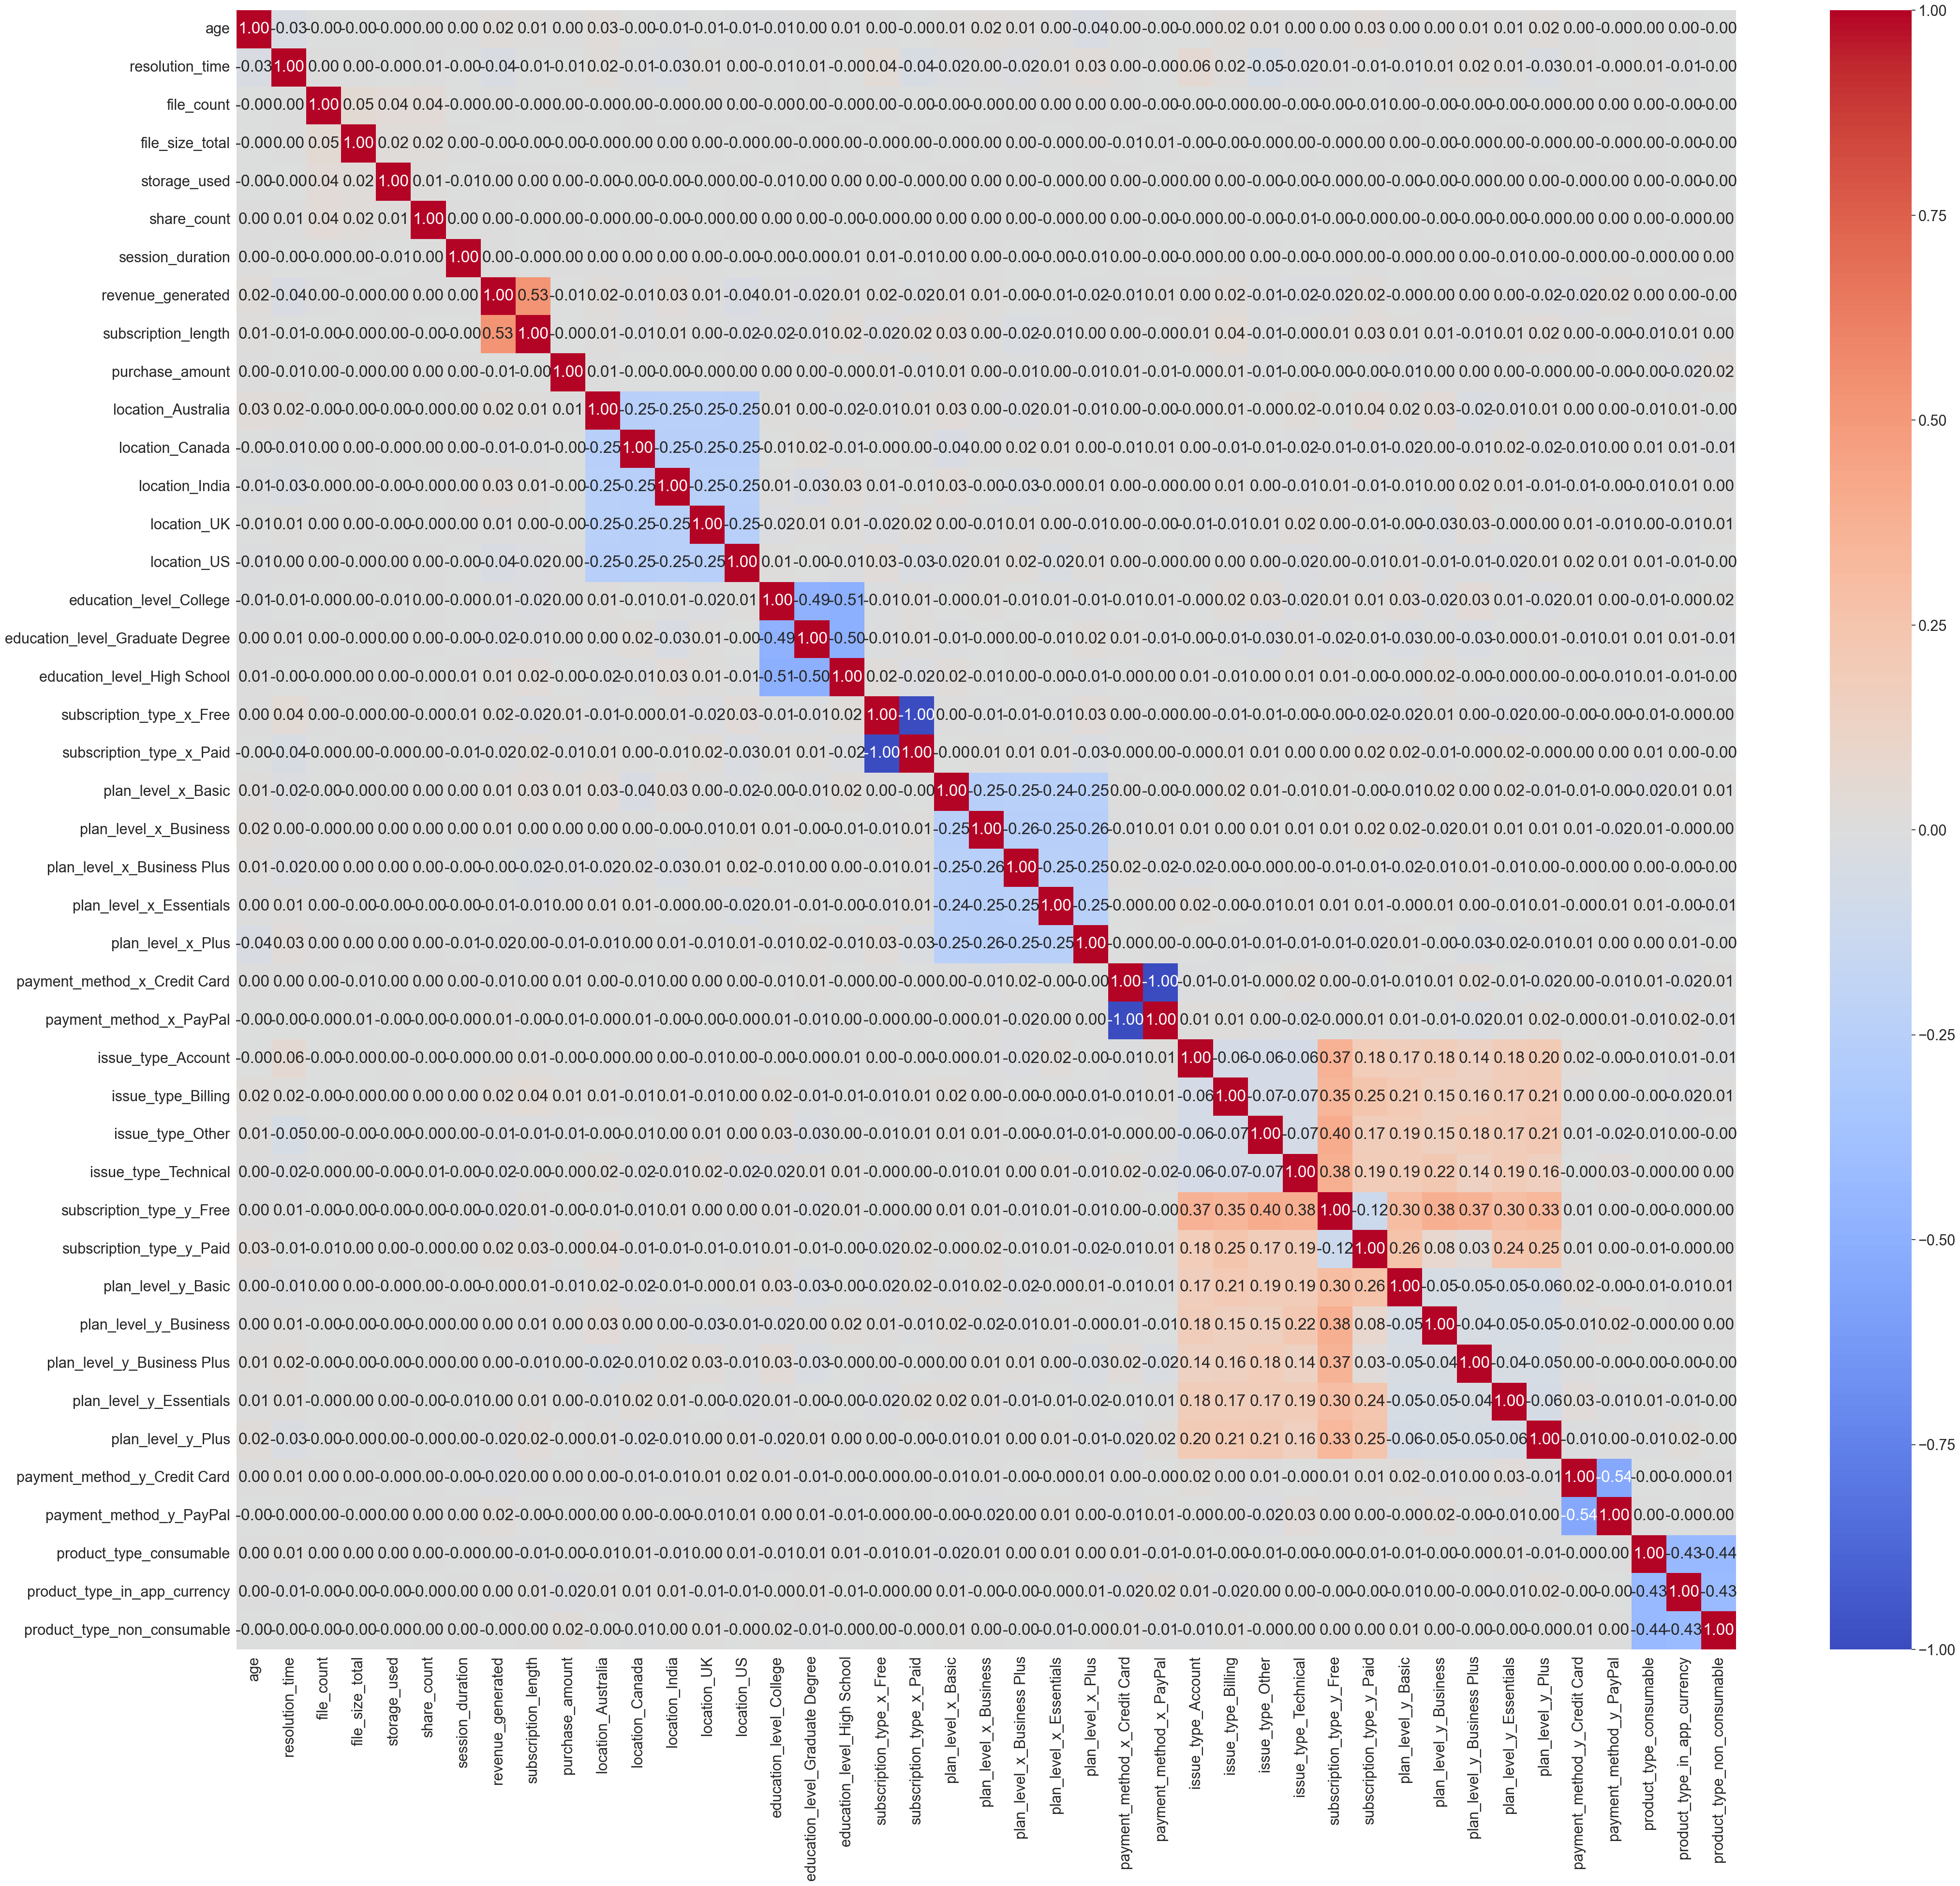

In [38]:
correlation_matrix = combined_df_reduced.corr()
plt.figure(figsize=(50, 44))
sns.set(font_scale=2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

For further analysis I am considering only columns which are highly correlated (In this case threshold = 0.1)

In [50]:
threshold = 0.1

# Creating a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

high_correlations = correlation_matrix.where(np.triu(correlation_matrix, 1) > threshold)
high_correlations = high_correlations.stack()

filtered_cols = list(set(high_correlations.index.get_level_values(0).tolist() + high_correlations.index.get_level_values(1).tolist()))

filtered_df = combined_df_reduced[filtered_cols]

print(filtered_df.head())

   issue_type_Technical  plan_level_y_Essentials  plan_level_y_Basic  \
0                 False                    False               False   
1                 False                    False               False   
2                 False                    False               False   
3                 False                    False               False   
4                 False                    False               False   

   plan_level_y_Business  plan_level_y_Plus  issue_type_Account  \
0                  False              False               False   
1                  False              False               False   
2                  False              False               False   
3                  False              False               False   
4                  False              False               False   

   subscription_type_y_Free  subscription_type_y_Paid  subscription_length  \
0                     False                      True                 17.3   
1       

In [51]:
filtered_df.columns

Index(['issue_type_Technical', 'plan_level_y_Essentials', 'plan_level_y_Basic',
       'plan_level_y_Business', 'plan_level_y_Plus', 'issue_type_Account',
       'subscription_type_y_Free', 'subscription_type_y_Paid',
       'subscription_length', 'plan_level_y_Business Plus',
       'issue_type_Billing', 'issue_type_Other', 'revenue_generated'],
      dtype='object')

In [43]:
combined_df.columns

Index(['user_id', 'age', 'account_creation_date', 'interaction_id',
       'interaction_date', 'resolution_time', 'age_group', 'date',
       'file_count', 'file_size_total', 'storage_used', 'share_count',
       'session_id', 'session_start_time', 'session_end_time',
       'session_duration', 'subscription_start_date', 'subscription_end_date',
       'plan_level', 'revenue_generated', 'upgrade_date', 'downgrade_date',
       'cancellation_date', 'subscription_length', 'revenue_segment',
       'purchase_date', 'purchase_amount', 'gender_Female', 'gender_Male',
       'gender_Other', 'location_Australia', 'location_Canada',
       'location_India', 'location_UK', 'location_US',
       'occupation_Entrepreneur', 'occupation_Manager',
       'occupation_Professional', 'occupation_Retired', 'occupation_Student',
       'education_level_College', 'education_level_Graduate Degree',
       'education_level_High School', 'subscription_type_x_Free',
       'subscription_type_x_Paid', 'plan_le

Adding some features for CLTV

In [52]:
filtered_df = filtered_df.assign(**combined_df[['user_id', 'purchase_date', 'purchase_amount', 'product_type_consumable', 'product_type_in_app_currency',  'product_type_non_consumable']])

In [53]:
filtered_df.head()

,issue_type_Technical,plan_level_y_Essentials,plan_level_y_Basic,plan_level_y_Business,plan_level_y_Plus,issue_type_Account,subscription_type_y_Free,subscription_type_y_Paid,subscription_length,plan_level_y_Business Plus,issue_type_Billing,issue_type_Other,revenue_generated,user_id,purchase_date,purchase_amount,product_type_consumable,product_type_in_app_currency,product_type_non_consumable
0,False,False,False,False,False,False,False,True,17.3,True,False,True,173.0,1,2023-09-04,63.628653,False,False,True
1,False,False,False,False,False,False,False,True,17.3,True,False,True,173.0,1,2023-06-15,46.478209,False,True,False
2,False,False,False,False,False,False,False,True,17.3,True,False,True,173.0,1,2023-09-04,63.628653,False,False,True
3,False,False,False,False,False,False,False,True,17.3,True,False,True,173.0,1,2023-06-15,46.478209,False,True,False
4,False,False,False,False,False,False,False,True,17.3,True,False,True,173.0,1,2023-09-04,63.628653,False,False,True


In [104]:
filtered_df.columns

Index(['issue_type_Technical', 'plan_level_y_Essentials', 'plan_level_y_Basic',
       'plan_level_y_Business', 'plan_level_y_Plus', 'issue_type_Account',
       'subscription_type_y_Free', 'subscription_type_y_Paid',
       'subscription_length', 'plan_level_y_Business Plus',
       'issue_type_Billing', 'issue_type_Other', 'revenue_generated',
       'user_id', 'purchase_date', 'purchase_amount',
       'product_type_consumable', 'product_type_in_app_currency',
       'product_type_non_consumable'],
      dtype='object')

### CLTV (Customer Lifetime Value)

In [57]:
Transaction_data = subscription_data[['user_id', 'subscription_start_date', 'revenue_generated']]

In [58]:
Transaction_data

,user_id,subscription_start_date,revenue_generated
0,1,2023-05-28,173.000000
1,2,2023-11-10,306.666667
2,3,2023-08-19,40.666667
3,4,2023-07-21,215.000000
4,6,2023-06-05,408.333333
...,...,...,...
6967,9995,2023-07-25,346.000000
6968,9996,2023-08-21,446.666667
6969,9997,2023-09-16,963.333333
6970,9998,2023-06-06,386.666667


In [60]:
combined_df.columns

Index(['user_id', 'age', 'account_creation_date', 'interaction_id',
       'interaction_date', 'resolution_time', 'age_group', 'date',
       'file_count', 'file_size_total', 'storage_used', 'share_count',
       'session_id', 'session_start_time', 'session_end_time',
       'session_duration', 'subscription_start_date', 'subscription_end_date',
       'plan_level', 'revenue_generated', 'upgrade_date', 'downgrade_date',
       'cancellation_date', 'subscription_length', 'revenue_segment',
       'purchase_date', 'purchase_amount', 'gender_Female', 'gender_Male',
       'gender_Other', 'location_Australia', 'location_Canada',
       'location_India', 'location_UK', 'location_US',
       'occupation_Entrepreneur', 'occupation_Manager',
       'occupation_Professional', 'occupation_Retired', 'occupation_Student',
       'education_level_College', 'education_level_Graduate Degree',
       'education_level_High School', 'subscription_type_x_Free',
       'subscription_type_x_Paid', 'plan_le

In [61]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# List of continuous features to scale
continuous_features = ['age', 'resolution_time', 'file_count', 'file_size_total', 
                       'storage_used', 'share_count', 'session_duration', 
                       'revenue_generated', 'purchase_amount']

# Fit and transform the data
scaled_features = scaler.fit_transform(combined_df[continuous_features])

combined_df[continuous_features] = scaled_features

In [62]:
combined_df

,user_id,age,account_creation_date,interaction_id,interaction_date,resolution_time,age_group,date,file_count,file_size_total,...,plan_level_y_Basic,plan_level_y_Business,plan_level_y_Business Plus,plan_level_y_Essentials,plan_level_y_Plus,payment_method_y_Credit Card,payment_method_y_PayPal,product_type_consumable,product_type_in_app_currency,product_type_non_consumable
0,1,0.529142,2022-12-31,1_2,"DatetimeIndex(['2023-05-19'], dtype='datetime6...",-1.430006,Gen X,2023-11-22,-1.647345,-1.212020,...,False,False,True,False,False,False,True,False,False,True
1,1,0.529142,2022-12-31,1_2,"DatetimeIndex(['2023-05-19'], dtype='datetime6...",-1.430006,Gen X,2023-11-22,-1.647345,-1.212020,...,False,False,True,False,False,False,True,False,True,False
2,1,0.529142,2022-12-31,1_2,"DatetimeIndex(['2023-05-19'], dtype='datetime6...",-1.430006,Gen X,2023-01-06,0.411506,-1.691076,...,False,False,True,False,False,False,True,False,False,True
3,1,0.529142,2022-12-31,1_2,"DatetimeIndex(['2023-05-19'], dtype='datetime6...",-1.430006,Gen X,2023-01-06,0.411506,-1.691076,...,False,False,True,False,False,False,True,False,True,False
4,1,0.529142,2022-12-31,1_2,"DatetimeIndex(['2023-05-19'], dtype='datetime6...",-1.430006,Gen X,2023-10-31,-1.020250,0.491146,...,False,False,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443081,10000,-0.244498,2022-12-29,10000_2,"DatetimeIndex(['2023-05-24'], dtype='datetime6...",1.501428,Millennials,2023-11-07,-1.493405,-0.258013,...,False,False,False,False,True,True,False,False,True,False
443082,10000,-0.244498,2022-12-29,10000_2,"DatetimeIndex(['2023-05-24'], dtype='datetime6...",1.501428,Millennials,2023-06-21,-0.233464,-0.412195,...,False,False,False,False,True,True,False,False,False,True
443083,10000,-0.244498,2022-12-29,10000_2,"DatetimeIndex(['2023-05-24'], dtype='datetime6...",1.501428,Millennials,2023-06-21,-0.233464,-0.412195,...,False,False,False,False,True,True,False,False,True,False
443084,10000,-0.244498,2022-12-29,10000_2,"DatetimeIndex(['2023-05-24'], dtype='datetime6...",1.501428,Millennials,2023-10-30,-0.829355,-1.108517,...,False,False,False,False,True,True,False,False,False,True


In [71]:
combined_df['session_duration']

0         1.428038
1         1.428038
2        -0.377029
3        -0.377029
4         0.594930
            ...   
443081   -1.626692
443082   -0.168752
443083   -0.168752
443084    1.358613
443085    1.358613
Name: session_duration, Length: 443086, dtype: float64

In [95]:
# average session duration
avg_sessiom_duration = sum(usage_data['session_duration'])/usage_data['user_id'].count()
avg_sessiom_duration

np.float64(2067.8372050222893)

In [78]:
usage_data

,user_id,date,file_count,file_size_total,storage_used,share_count,device_type,feature_used,session_id,session_start_time,session_end_time,session_duration
0,1,2023-11-22,10.004219,1584.340749,21.099481,4.795337,mobile,file_editing,1_2023-11-22 00:00:00_6,2023-11-22 20:00:00,2023-11-22 20:55:00,3300.0
1,1,2023-01-06,70.400000,100.980000,31.185000,1.890000,tablet,file_editing,1_2023-01-06 00:00:00_1,2023-01-06 18:00:00,2023-01-06 18:29:00,1740.0
2,1,2023-10-31,28.399882,6858.059640,20.868711,0.948578,mobile,commenting,1_2023-10-31 00:00:00_4,2023-10-31 17:00:00,2023-10-31 17:43:00,2580.0
3,1,2023-08-16,21.120000,10749.510000,18.480000,10.395000,desktop,file_sharing,1_2023-08-16 00:00:00_7,2023-08-16 06:00:00,2023-08-16 06:31:00,1860.0
4,1,2023-03-06,77.000000,7105.320000,15.750000,5.250000,tablet,file_sharing,1_2023-03-06 00:00:00_9,2023-03-06 00:00:00,2023-03-06 00:31:00,1860.0
...,...,...,...,...,...,...,...,...,...,...,...,...
195603,10000,2023-05-04,36.750103,10878.550898,31.088400,5.757111,desktop,file_sharing,10000_2023-05-04 00:00:00_2,2023-05-04 05:00:00,2023-05-04 05:23:00,1380.0
195604,10000,2023-08-03,17.944294,7842.339802,33.175629,0.000000,desktop,commenting,10000_2023-08-03 00:00:00_9,2023-08-03 15:00:00,2023-08-03 15:24:00,1440.0
195605,10000,2023-11-07,14.520000,4538.349000,50.715000,1.102500,desktop,commenting,10000_2023-11-07 00:00:00_7,2023-11-07 02:00:00,2023-11-07 02:11:00,660.0
195606,10000,2023-06-21,51.480000,4060.935000,39.900000,7.980000,desktop,file_editing,10000_2023-06-21 00:00:00_3,2023-06-21 14:00:00,2023-06-21 14:32:00,1920.0


In [92]:
# total number of sessions

total_sessions = combined_df['session_id'].count()
total_sessions

np.int64(443086)

In [90]:
customer_support

,interaction_id,user_id,interaction_date,issue_type,resolution_time,subscription_type,plan_level
0,1_2,1,"DatetimeIndex(['2023-05-19'], dtype='datetime6...",Other,18,Paid,Business Plus
1,2_1,2,"DatetimeIndex(['2023-10-03'], dtype='datetime6...",Billing,64,Free,Essentials
2,17_2,17,"DatetimeIndex(['2023-10-26'], dtype='datetime6...",Billing,55,Free,Business Plus
3,17_3,17,"DatetimeIndex(['2023-11-05'], dtype='datetime6...",Billing,40,Free,Business Plus
4,19_3,19,"DatetimeIndex(['2023-03-06'], dtype='datetime6...",Other,27,Free,Basic
...,...,...,...,...,...,...,...
2542,9976_1,9976,"DatetimeIndex(['2023-07-02'], dtype='datetime6...",Other,109,Free,Business Plus
2543,9979_1,9979,"DatetimeIndex(['2023-08-17'], dtype='datetime6...",Other,17,Free,Essentials
2544,9988_4,9988,"DatetimeIndex(['2023-08-18'], dtype='datetime6...",Billing,67,Free,Essentials
2545,10000_1,10000,"DatetimeIndex(['2023-10-15'], dtype='datetime6...",Other,29,Free,Plus


In [87]:
# total number of interactions

total_interactions = combined_df['interaction_id'].count()

In [88]:
total_interactions

np.int64(107455)

In [97]:
avg_resolution_time = sum(customer_support['resolution_time'])/customer_support['user_id'].count()
avg_resolution_time

np.float64(63.73773066352572)

In [137]:
#combined_df['interaction_id'] = combined_df['interaction_id'].fillna(-1)
#combined_df['interaction_date'] = combined_df['interaction_date'].fillna('2999-12-30')

combined_df['resolution_time'] = combined_df['resolution_time'].fillna(-10000000)
#'No_group' to the list of categories
#combined_df['age_group'] = combined_df['age_group'].cat.add_categories('No_group')
# fill NaN values with 'No_group'
combined_df['age_group'] = combined_df['age_group'].fillna('No_group')
combined_df['subscription_start_date'] = combined_df['subscription_start_date'].fillna('2999-12-30')
combined_df['subscription_end_date'] = combined_df['subscription_end_date'].fillna('2999-12-30')

In [139]:
combined_df['plan_level'] = combined_df['plan_level'].fillna('Basic')
combined_df['revenue_generated'] = combined_df['revenue_generated'].fillna(0)
combined_df['upgrade_date'] = combined_df['upgrade_date'].fillna('2999-12-30')
combined_df['downgrade_date'] = combined_df['downgrade_date'].fillna('2999-12-30')
combined_df['cancellation_date'] = combined_df['cancellation_date'].fillna('2999-12-30')
combined_df['subscription_length'] = combined_df['subscription_length'].fillna(0)
combined_df['subscription_start_date'] = combined_df['subscription_start_date'].fillna('2999-12-30')
combined_df['subscription_end_date'] = combined_df['subscription_end_date'].fillna('2999-12-30')
#combined_df['revenue_segment'] = combined_df['revenue_segment'].cat.add_categories('No_segment')
combined_df['revenue_segment'] = combined_df['revenue_segment'].fillna('No_segment')

combined_df['purchase_date'] = combined_df['purchase_date'].fillna('2999-12-30')
combined_df['purchase_amount'] = combined_df['purchase_amount'].fillna(0)

In [141]:
combined_df['interaction_date'] = combined_df['interaction_date'].fillna('2999-12-30')

In [150]:
from sklearn.model_selection import train_test_split

x = combined_df.drop(columns=['user_id', 'revenue_generated'])
y = combined_df['revenue_generated']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [165]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [159]:
# Identify columns with 'date' in the column name
date_columns = [col for col in X_train.columns if 'time' in col.lower()]

In [160]:
# Drop columns with 'date' in their names
X_train = X_train.drop(columns=date_columns)
X_test = X_test.drop(columns=date_columns)


In [163]:
categorical_columns = X_train.select_dtypes(include=['category', 'object']).columns

In [164]:
X_train = X_train.drop(columns=categorical_columns)
X_test = X_test.drop(columns=categorical_columns)

In [166]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.4435265114088307
Root Mean Squared Error (RMSE): 0.7108820187675142
R-squared (R²): 0.28308272555647596


/Users/bharadwajvvs/Documents/Projects/Self Projects/Dropbox_Project/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


While the MAE is relatively low, indicating reasonable accuracy in some cases, the RMSE and R² values suggest that your model's performance is not ideal. There is considerable room for improvement.

In [168]:
import pandas as pd

coefficients = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficient'])
print(coefficients.sort_values(by='Coefficient', ascending=False))

                                  Coefficient
plan_level_y_Business Plus       1.955302e+11
plan_level_y_Business            1.955302e+11
plan_level_y_Essentials          1.955302e+11
plan_level_y_Basic               1.955302e+11
plan_level_y_Plus                1.955302e+11
location_India                   1.053208e+11
location_Australia               1.053208e+11
location_UK                      1.053208e+11
location_Canada                  1.053208e+11
location_US                      1.053208e+11
education_level_College          3.650147e+10
education_level_High School      3.650147e+10
education_level_Graduate Degree  3.650147e+10
device_type_tablet               1.460313e+10
device_type_desktop              1.460313e+10
device_type_mobile               1.460313e+10
subscription_length              7.840991e-02
product_type_consumable          1.780701e-02
age                              9.266414e-03
product_type_non_consumable      8.728027e-03
product_type_in_app_currency     7

In [169]:
import joblib

joblib.dump(model, 'linear_regression_cltv_model.pkl')

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

### This model can be enhanced using Hyperparameter Tuning or trying a different model